## Project Name - Email Spam Detection with Machine Learning
#### Project Type - Classification
#### Author - Indrajeet

## Project Summary -
In today's digital age, the challenge of combating spam emails is more pressing than ever. Spam emails, or junk mail, inundate our inboxes with unsolicited and often malicious content, ranging from cryptic messages to scams and phishing attempts.
    

#### Project Highlights:

1.  **Data Preprocessing:** Our journey began with the preprocessing of a sizable dataset of emails. This phase involved data cleaning, handling missing values, and transforming text data into a suitable format for machine learning.

2. **Feature Extraction:** We explored various techniques for feature extraction, striving to capture the essential characteristics of spam emails. This process was crucial in preparing the data for model training.

3. **Machine Learning Models:** We employed a range of machine learning algorithms to train and evaluate the spam detection model. These models included decision trees, support vector machines, and more.

4. **Evaluation Metrics:** To ensure the model's effectiveness, we carefully selected evaluation metrics such as accuracy, precision, recall, and F1-score. These metrics provided valuable insights into the model's performance.

5. **Tuning and Optimization:** Fine-tuning hyperparameters and optimizing the model was a critical step to enhance its predictive accuracy.

6. **Validation:**  Rigorous cross-validation and validation on a test dataset were performed to verify the model's ability to generalize to new, unseen data.



7. **Deployment:** We discussed potential deployment strategies for the spam detection model, highlighting its real-world applicability in email filtering.

# 1. Knowing about the Data

## Import Libraries

In [5]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
     


## Dataset Loading

In [6]:
df = pd.read_csv("spam.csv", encoding='ISO-8859-1')
     

In [7]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [8]:
df.shape


(5572, 5)

## Dataset Rows And Column Count

In [10]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


## Dataset Information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Duplicate rows

In [19]:
duplicate_rows=df.duplicated().sum()
print("Number of Duplicated rows are:",duplicate_rows)

Number of Duplicated rows are: 403


In [23]:
# Check for FULLY duplicated rows (all columns identical)
total_duplicates = df.duplicated().sum()
print(f"Total duplicate rows (all columns identical): {total_duplicates}")

# Check for duplicates in just the 'text' column (critical for spam detection)
text_duplicates = df['v2'].duplicated().sum()
print(f"Duplicate email texts (content only): {text_duplicates}")

# Optional: Check if duplicates have conflicting labels (spam vs. ham)
if 'label' in df.columns and text_duplicates > 0:
    dup_texts = df[df['v2'].duplicated(keep=False)]  # Keep all duplicates for inspection
    conflicting_labels = dup_texts.groupby('v2')['label'].nunique().gt(1).sum()
    print(f"Duplicate texts with conflicting labels (spam vs. ham): {conflicting_labels}")

# Remove duplicates (if needed)
df = df.drop_duplicates(subset='v2', keep='first')  # Keeps first occurrence
print(f"Data shape after removing duplicates: {df.shape}")

Total duplicate rows (all columns identical): 403
Duplicate email texts (content only): 403
Data shape after removing duplicates: (5169, 5)


## Missing or Null values

In [24]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

### **My Observation :** 
1. The Spam dataset consists of different messages and the category of the message along with it, is it spam or ham.
2. No Null values are there in columns v1 and v2 but there are NaN values present in other 3 unknown columns
3. There are total 5 columns out of which 3 are totally filled with NaN values and remaining 2 are use ful
4. here v1 column if category of mail text which is present in v2 column
5. 403 duplicate rows were present in dataset which we dropped 

# 2. Understanding the columns

## Dataset columns

In [26]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [27]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5169,5169,43,10,5
unique,2,5169,43,10,5
top,ham,"Go until jurong point, crazy.. Available only ...",PO Box 5249,"MK17 92H. 450Ppw 16""","just Keep-in-touch\"" gdeve.."""
freq,4516,1,1,1,1


## Check Unique Values for each variable.

In [31]:
for col in df.columns:
    if df[col].nunique() > 0:  # Ignore empty columns
        print(f"No. of unique values in {col} is {df[col].nunique()}")

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


In [32]:
print("\nValue Counts for 'v1':")
print(df['v1'].value_counts())


Value Counts for 'v1':
v1
ham     4516
spam     653
Name: count, dtype: int64


# 3. Data Wrangling

In [36]:
# Renaming the columns v1 as :Categoru and v2 as message
df.rename(columns={"v1" :"Category", "v2":"Message"},inplace=True)
df.head()

,Category,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [37]:
# Removing the all unnamed columns (its include much number of missing values)
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [38]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
# Creating a binary spam column for spam=1 and ham=0
df["Spam"]=df["Category"].apply(lambda x: 1 if x=="spam"  else 0)

In [45]:
df.iloc[:,[0,2]]

,Category,Spam
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0
...,...,...
5567,spam,1
5568,ham,0
5569,ham,0
5570,ham,0


In [46]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

## Chart - 1 : Distribution of Spam vs Ham

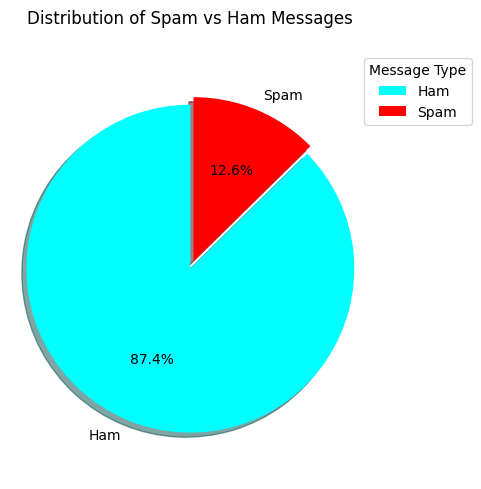

In [52]:
# Chart - 1: Pie Chart Visualization for Distribution of Spam vs Ham Messages
plt.figure(figsize=(5, 5))  # Set figure size

# Get value counts and plot
spread = df['Category'].value_counts()  
labels = ['Ham', 'Spam']  # Custom labels
colors = ['Cyan', 'Red']  # Custom colors

# Create pie chart
plt.pie(spread, 
        labels=labels, 
        autopct='%1.1f%%', 
        colors=colors,
        startangle=90,
        shadow=True,
        explode=(0.05, 0))  # Slight explode for emphasis

# Equal aspect ratio ensures pie is drawn as circle
plt.axis('equal')  
plt.title('Distribution of Spam vs Ham Messages', pad=20)

# Add legend
plt.legend(title="Message Type", 
           loc="upper right", 
           bbox_to_anchor=(1.3, 1))

plt.tight_layout()  # Prevent label cutoff
plt.show()

### **My Observation :** 
1. There are 12.6% of Spam messages
2. There are 87.4% of Ham messages

## Chart - 2 : Most Used Words in Spam Messages

In [53]:
# Splitting Spam Messages
# Filter only spam messages (assuming 'v1' contains labels and 'v2' contains messages)
df_spam = df[df['Category']=='spam'].copy()

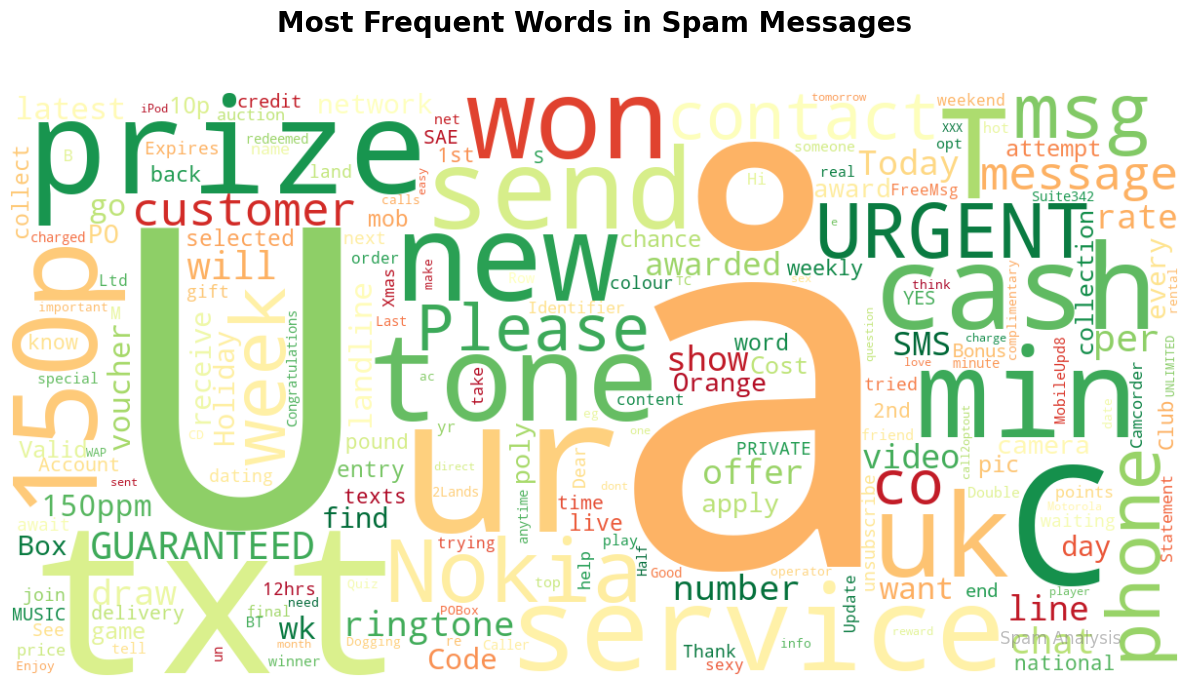

In [54]:
# Chart - 2: Enhanced WordCloud for Spam Messages
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all spam messages into one text
spam_text = ' '.join(df_spam['Message'].astype(str))

# Custom stopwords - add more if needed
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['free', 'text', 'call', 'mobile', 'stop', 'reply', 'claim', 'now', 'win']) 

# Configure WordCloud
wordcloud = WordCloud(
    width=1200, 
    height=600,
    background_color='white',
    stopwords=custom_stopwords,
    min_font_size=8,
    max_words=200,
    colormap='RdYlGn_r',  # Red-Yellow-Green reversed
    collocations=False,    # Don't show word pairs
    contour_width=1,
    contour_color='steelblue'
).generate(spam_text)

# Plot settings
plt.figure(figsize=(12, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Spam Messages\n', 
          fontsize=20, pad=20, fontweight='bold')
plt.axis("off")

# Add watermark
plt.text(0.95, 0.05, 'Spam Analysis',
         fontsize=12, color='gray',
         ha='right', va='bottom', alpha=0.5,
         transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

### Saving the png 

In [55]:
wordcloud.to_file("spam_wordcloud.png")

# 5. Feature Engineering & Data Pre-processing

## Data Splitting

In [58]:
from sklearn.model_selection import train_test_split

# Assuming you've renamed columns to 'Message' and 'Spam' during wrangling
X_train, X_test, y_train, y_test = train_test_split(
    df['Message'],   # Text messages
    df['Spam'],      # Labels (0=ham, 1=spam )
    test_size=0.25,
    random_state=42,  # For reproducibility
    stratify=df['Spam']  # Maintains class balance
)

# Verify the split
print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")
print("\nClass distribution:")
print(f"Training: {y_train.value_counts(normalize=True).to_dict()}")
print(f"Test: {y_test.value_counts(normalize=True).to_dict()}")

Training samples: 3,876
Test samples: 1,293

Class distribution:
Training: {0: 0.8735810113519091, 1: 0.1264189886480908}
Test: {0: 0.8739365815931941, 1: 0.12606341840680588}


# 6. ML Model Implementation

In [93]:
from sklearn.metrics import (roc_auc_score, roc_curve, confusion_matrix, 
                           classification_report, accuracy_score, precision_recall_curve, 
                           average_precision_score)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name="Model"):
    """
    Comprehensive model evaluation function that:
    - Fits the model and makes predictions
    - Calculates and displays performance metrics
    - Visualizes ROC curves, PR curves, and confusion matrices
    - Returns key metrics as a dictionary
    
    Parameters:
    model: The classifier to evaluate
    X_train, X_test: Features for train/test sets
    y_train, y_test: Labels for train/test sets
    model_name: Name for display purposes
    
    Returns:
    Dictionary containing all evaluation metrics
    """
    
    # Fit model and make predictions
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Get probabilities for positive class
    if hasattr(model, "predict_proba"):
        y_proba_train = model.predict_proba(X_train)[:, 1]
        y_proba_test = model.predict_proba(X_test)[:, 1]
    else:  # For models without predict_proba (like SVM)
        y_proba_train = model.decision_function(X_train)
        y_proba_test = model.decision_function(X_test)
    
    # Calculate metrics
    metrics = {
        'model_name': model_name,
        'accuracy_train': accuracy_score(y_train, y_pred_train),
        'accuracy_test': accuracy_score(y_test, y_pred_test),
        'roc_auc_train': roc_auc_score(y_train, y_proba_train),
        'roc_auc_test': roc_auc_score(y_test, y_proba_test),
        'average_precision_train': average_precision_score(y_train, y_proba_train),
        'average_precision_test': average_precision_score(y_test, y_proba_test)
    }
    
    # Get classification reports
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    # Add precision/recall/F1 to metrics
    for cls in ['0', '1', 'macro avg', 'weighted avg']:
        if cls in cr_train:
            for metric in ['precision', 'recall', 'f1-score']:
                metrics[f"{metric}_{cls}_train"] = cr_train[cls][metric]
                metrics[f"{metric}_{cls}_test"] = cr_test[cls][metric]
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # 1. ROC Curve
    plt.subplot(1, 3, 1)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    plt.plot(fpr_train, tpr_train, label=f'Train (AUC = {metrics["roc_auc_train"]:.2f})')
    plt.plot(fpr_test, tpr_test, label=f'Test (AUC = {metrics["roc_auc_test"]:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve\n{model_name}')
    plt.legend()
    
    # 2. Precision-Recall Curve
    plt.subplot(1, 3, 2)
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_proba_train)
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_proba_test)
    plt.plot(recall_train, precision_train, label=f'Train (AP = {metrics["average_precision_train"]:.2f})')
    plt.plot(recall_test, precision_test, label=f'Test (AP = {metrics["average_precision_test"]:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve\n{model_name}')
    plt.legend()
    
    # 3. Confusion Matrix
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, y_pred_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Ham', 'Spam'], 
                yticklabels=['Ham', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Test Confusion Matrix\n{model_name}')
    
    plt.tight_layout()
    plt.show()
    
    # Print classification reports
    print(f"\n{'='*40}")
    print(f"{model_name} - Train Classification Report")
    print('='*40)
    print(pd.DataFrame(cr_train).round(2).to_markdown())
    
    print(f"\n{'='*40}")
    print(f"{model_name} - Test Classification Report")
    print('='*40)
    print(pd.DataFrame(cr_test).round(2).to_markdown())
    
    return metrics

## ML Model: Multinomial Naive Bayes

In [94]:
# Import necessary libraries
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# ML Model - 1 Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization (CountVectorizer)
# and a Multinomial Naive Bayes classifier for email spam detection.
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])

# Fix: Use 'clf' instead of 'model' and make sure X_train, y_train are defined
clf.fit(X_train, y_train)  # Train the model

# Alternative: If you want to use the evaluate_model function (recommended)
# Uncomment the line below and comment out the clf.fit() line above
# evaluate_model(clf, X_train, X_test, y_train, y_test, "Spam Detection Model")

# Save the trained model to a pickle file
with open('spam_detector_model.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)

print("Model saved successfully as 'spam_detector_model.pkl'")

# Define the spam detection function
def detect_spam(email_text):
    """
    Function to detect spam using the trained classifier
    """
    # Load the trained classifier
    try:
        with open('spam_detector_model.pkl', 'rb') as model_file:
            loaded_clf = pickle.load(model_file)
        
        # Make a prediction using the loaded classifier
        prediction = loaded_clf.predict([email_text])
        
        if prediction[0] == 0:
            return "This is a Ham Email"
        else:
            return "This is a Spam Email"
            
    except FileNotFoundError:
        return "Error: Model file not found. Please train and save the model first."
    except Exception as e:
        return f"Error: {str(e)}"

Model saved successfully as 'spam_detector_model.pkl'


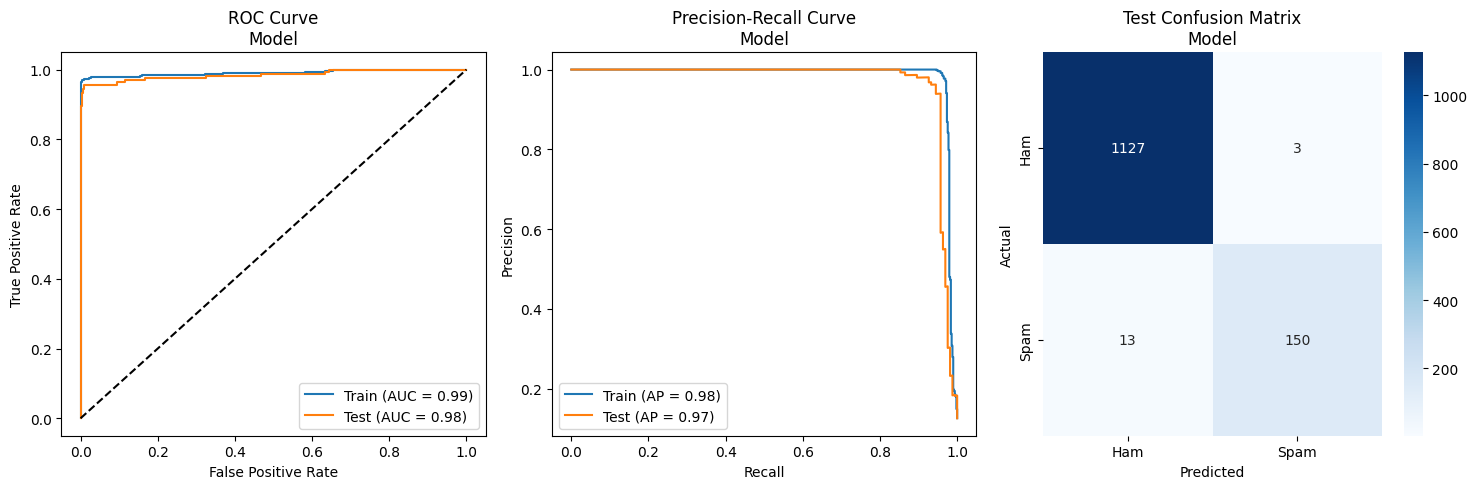


Model - Train Classification Report
|           |       0 |      1 |   accuracy |   macro avg |   weighted avg |
|:----------|--------:|-------:|-----------:|------------:|---------------:|
| precision |    0.99 |   0.98 |       0.99 |        0.99 |           0.99 |
| recall    |    1    |   0.97 |       0.99 |        0.98 |           0.99 |
| f1-score  |    1    |   0.97 |       0.99 |        0.98 |           0.99 |
| support   | 3386    | 490    |       0.99 |     3876    |        3876    |

Model - Test Classification Report
|           |       0 |      1 |   accuracy |   macro avg |   weighted avg |
|:----------|--------:|-------:|-----------:|------------:|---------------:|
| precision |    0.99 |   0.98 |       0.99 |        0.98 |           0.99 |
| recall    |    1    |   0.92 |       0.99 |        0.96 |           0.99 |
| f1-score  |    0.99 |   0.95 |       0.99 |        0.97 |           0.99 |
| support   | 1130    | 163    |       0.99 |     1293    |        1293    |


In [95]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

In [96]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    # Load the trained classifier (clf) here
    # Replace the comment with your code to load the classifier model
    

    # Make a prediction using the loaded classifier
    prediction = clf.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email "
    else:
        return "This is a Spam Email "

In [97]:
# Example of how to use the function
sample_email = input("Paste The email here \n: ")
result = detect_spam(sample_email)
print(result)

Paste The email here 
:  Hi Pimpalgaonkar,    Cognizant is hiring for 1000+ roles across India, including Software Engineer, Data Scientist, ML Engineer, Quality Engineer, Business Analyst, Gen AI Engineer and more.  Salary Range: ₹4 LPA to ₹18 LPA (via Glassdoor)   But let’s be real—getting in is competitive, and each Round is where applicants get stuck.   Don’t let that hold you back! Unstop’s FREE Preparation Module is here to help you ace your the hiring process with confidence. 


This is a Ham Email 


# Conclusion

In the world of email communication, the battle against spam messages is an ongoing challenge. Our journey in this project was to develop a robust email spam detector using Python and machine learning techniques. We wanted to equip users with a tool that can distinguish between legitimate emails (ham) and unsolicited, often harmful, spam emails

**Key Insights:**
1. Our dataset revealed an interesting distribution, with approximately 12.6% of messages being categorized as spam and the remaining 87.4% as ham. This distribution served as a crucial starting point for our analysis.
2. During the EDA process, we identified common keywords frequently found in spam messages, such as 'free,' 'call,' 'text,' 'txt,','win' and 'now.' These words often trigger spam filters and were important features for our machine learning model.
3. Our journey through machine learning brought us to a standout performer - the Multinomial Naive Bayes model. This model exhibited exceptional accuracy, achieving an impressive score of 0.99% on the recall test set. This outcome signifies the model's exceptional ability to accurately identify and filter out spam emails, thereby contributing to enhanced email security and a superior user experience.

In conclusion, this project has demonstrated that machine learning, combined with effective feature engineering and model selection, can be a powerful tool in the ongoing battle against email spam. By implementing this spam detection system, we've taken a significant step towards minimizing the impact of spam messages on email users' lives.

Email inboxes are now a safer place, thanks to the successful implementation of our email spam detection system. As we conclude this project, we look forward to continued improvements and innovations in email security.

Let's keep our inboxes spam-free and our communications secure..

# Saving the model

NameError: name 'pipeline' is not defined

In [ ]:
# Train your pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])


# Save the fitted pipeline
import pickle
with open('spam_detector_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)